In [1]:
import sys
sys.path.append("../")

In [2]:
%load_ext autoreload
%autoreload 2

from src.ksd.ksd import KSD
from src.ksd.kernel import IMQ, RBF, Linear

import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm, trange
import pickle

import high_dim_power as hd

import matplotlib as mpl
mpl.rcParams["mathtext.fontset"] = "cm"

In [4]:
tf.random.set_seed(1)

DELTA = 0.1

BANDWIDTH_POWER = 1.

STATISTIC = "ksd" #"mmd" #   

KERNEL = RBF # Linear # 

DIR = "../res/high_dim"
SUFFIX = f"delta{DELTA}_r{BANDWIDTH_POWER}_{STATISTIC}_{KERNEL.__name__}"

In [5]:
dims = [1, 2, 4, 25, 50, 100, 250, 500, 1000, 2000]
dims_quad = [1, 2, 4, 25, 50, 100, 250, 500, 1000]

ns = [50] * len(dims)

ns_quad = [max(2, int(d**1.2)) for d in dims]

ns_sqrt = [max(2, int(d**0.5)) for d in dims]

# Load results

In [6]:
# load analytical res
res_analytical_save = pd.read_csv(
    f"{DIR}/res_analytical_{SUFFIX}.csv",
)
# res_analytical = {c: res_analytical_save[c].to_list() for c in res_analytical_save.columns}
# dims = list(res_analytical["dim"])
res_analytical = res_analytical_save.set_index("dim", drop=False)

In [7]:
# load empirical results
# fixed n
stats_res_list = pickle.load(
    open(f"{DIR}/stats_res_rep_{SUFFIX}.p", "rb"),
)

# quadratic increasing n
stats_res_list_quad = pickle.load(
    open(f"{DIR}/stats_res_rep_{SUFFIX}_quad.p", "rb"),
)

# sqrt increasing n
stats_res_list_sqrt = pickle.load(
    open(f"{DIR}/stats_res_rep_{SUFFIX}_sqrt.p", "rb"),
)


# Initialise result classes

In [9]:
# fixed n
d = dims[-1]
print("dim:", d)
ts = res_analytical.loc[d, "expectation"] * np.linspace(.25, 1.75, 101)

hd_limits_rep_dims = hd.LimitDistExperimentRepeatedMultiDims(
    empirical_vals_dims_list=stats_res_list,
    res_analytical=res_analytical,
    dims=dims,
    ns=ns,
    ts=ts,
)

dim: 2000


In [13]:
# quadratic n
d = 1000
print("dim:", d)
ts_quad = res_analytical.loc[d, "expectation"] * np.linspace(.25, 1.75, 101)

hd_limits_rep_dims_quad = hd.LimitDistExperimentRepeatedMultiDims(
    empirical_vals_dims_list=stats_res_list_quad,
    res_analytical=res_analytical,
    dims=dims_quad,
    ns=ns_quad,
    ts=ts_quad,
)

dim: 1000


In [14]:
# sqrt n
d = dims[-1]
print("dim:", d)
ts_sqrt = res_analytical.loc[d, "expectation"] * np.linspace(.25, 1.75, 101)

hd_limits_rep_dims_sqrt = hd.LimitDistExperimentRepeatedMultiDims(
    empirical_vals_dims_list=stats_res_list_sqrt,
    res_analytical=res_analytical,
    dims=dims,
    ns=ns_sqrt,
    ts=ts_sqrt,
)

dim: 2000


## distance

In [15]:
# compute distances
dist_rep = hd_limits_rep_dims.compute_distance(size=100000)

dist_rep.replace({
    "probs": "Exceeding prob", 
    "cond": "Classic", 
    "full": "High dim Gaussian",
    "mm_full": "High dim Gamma",
}, inplace=True)

# quadratic n
dist_rep_quad = hd_limits_rep_dims_quad.compute_distance(size=100000)

dist_rep_quad.replace({
    "probs": "Exceeding prob", 
    "cond": "Classic", 
    "full": "High dim Gaussian",
    "mm_full": "High dim Gamma",
}, inplace=True)

# sqrt n
dist_rep_sqrt = hd_limits_rep_dims_sqrt.compute_distance(size=100000)

dist_rep_sqrt.replace({
    "probs": "Exceeding prob", 
    "cond": "Classic", 
    "full": "High dim Gaussian",
    "mm_full": "High dim Gamma",
}, inplace=True)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.78it/s]


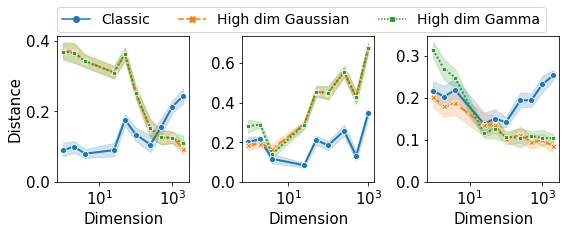

In [39]:
figs, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))

name_list = ["Classic", "High dim Gamma", "High dim Gaussian"]

# fixed n
sns.lineplot(
    ax=axes[0],
    data=dist_rep.loc[(dist_rep.name.isin(name_list)) & (dist_rep.seed < 10)], 
    x="dim", 
    y="dist", 
    hue="name",
    style="name",
    linewidth=2,
    markers=True,
)

axes[0].set_xlabel("Dimension", fontsize=15)
axes[0].set_ylabel("Distance", fontsize=15)
axes[0].set_ylim(bottom=0.)
axes[0].set_xscale("log")
axes[0].tick_params(labelsize=15)
axes[0].legend([],[], frameon=False)
axes[0].legend(
    fontsize=14, bbox_to_anchor=(3.75, 1.25), ncol=4, #columnspacing=0.7, handletextpad=0.01
)

# quad n
sns.lineplot(
    ax=axes[1],
    data=dist_rep_quad.loc[dist_rep_quad.name.isin(name_list)], 
    x="dim", 
    y="dist", 
    hue="name",
    style="name",
    linewidth=2,
    markers=True,
)

axes[1].set_xlabel("Dimension", fontsize=15)
axes[1].set_ylabel("")
axes[1].set_ylim(bottom=0.)
axes[1].set_xscale("log")
axes[1].tick_params(labelsize=15)
axes[1].legend([],[], frameon=False)

# sqrt n
sns.lineplot(
    ax=axes[2],
    data=dist_rep_sqrt.loc[dist_rep_sqrt.name.isin(name_list)], 
    x="dim", 
    y="dist", 
    hue="name",
    style="name",
    linewidth=2,
    markers=True,
)

axes[2].set_xlabel("Dimension", fontsize=15)
axes[2].set_ylabel("")
axes[2].set_ylim(bottom=0.)
axes[2].set_xscale("log")
axes[2].tick_params(labelsize=15)
axes[2].legend([],[], frameon=False)

plt.subplots_adjust(
    top=.8,
    wspace=0.4,
)
plt.savefig(f"../figs/high_dim/dist_{STATISTIC}_{KERNEL.__name__}_ns_dims.pdf", bbox_inches="tight")